<a href="https://colab.research.google.com/github/athirah-o/STQD6324_DataManagement_Assignment2/blob/main/P129566_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import chardet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = (r"/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/2004.csv/2004.csv")

In [ ]:
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))
    encoding = result['encoding']

In [ ]:
df = pd.read_csv(file_path, encoding=encoding)

In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129270 entries, 0 to 7129269
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [ ]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               127757
CRSDepTime                 0
ArrTime               141541
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                  127
ActualElapsedTime     141541
CRSElapsedTime             0
AirTime               141541
ArrDelay              141541
DepDelay              127757
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7001506
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [3]:
avgdelay_seasons = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/avgdelay_season.csv")
avgdelay_seasons.head()

,season,average_depdelay
0,Spring,55.117880
1,Summer,58.045588
2,Autumn,52.508008
3,Winter,54.988411


In [15]:
avgdelay_month = pd.read_csv('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/avgdelay_month.csv')
avgdelay_month

,month,season,average_depdelay
0,1,Winter,55.211587
1,10,Autumn,48.903121
2,11,Autumn,54.826072
3,12,Winter,56.876102
4,2,Winter,51.828058
5,3,Spring,53.111232
6,4,Spring,49.822461
7,5,Spring,60.880338
8,6,Summer,58.382447
9,7,Summer,58.421824


In [18]:
avgdelay_dow = pd.read_csv('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/avgdelay_dow.csv')
avgdelay_dow

,dow,average_depdelay
0,Friday,54.255980
1,Monday,56.856335
2,Saturday,51.253766
3,Sunday,56.185231
4,Thursday,56.979750
5,Tuesday,54.131261
6,Wednesday,56.919232


In [37]:
avgdelay_tod = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/avgdelay_tod.csv")
avgdelay_tod.head()

,crsdeptime_interval,average_depdelay
0,Afternoon,55.835837
1,Early_Morning,57.342149
2,Evening,59.252205
3,Late_Night,48.838598
4,Midday,51.736316


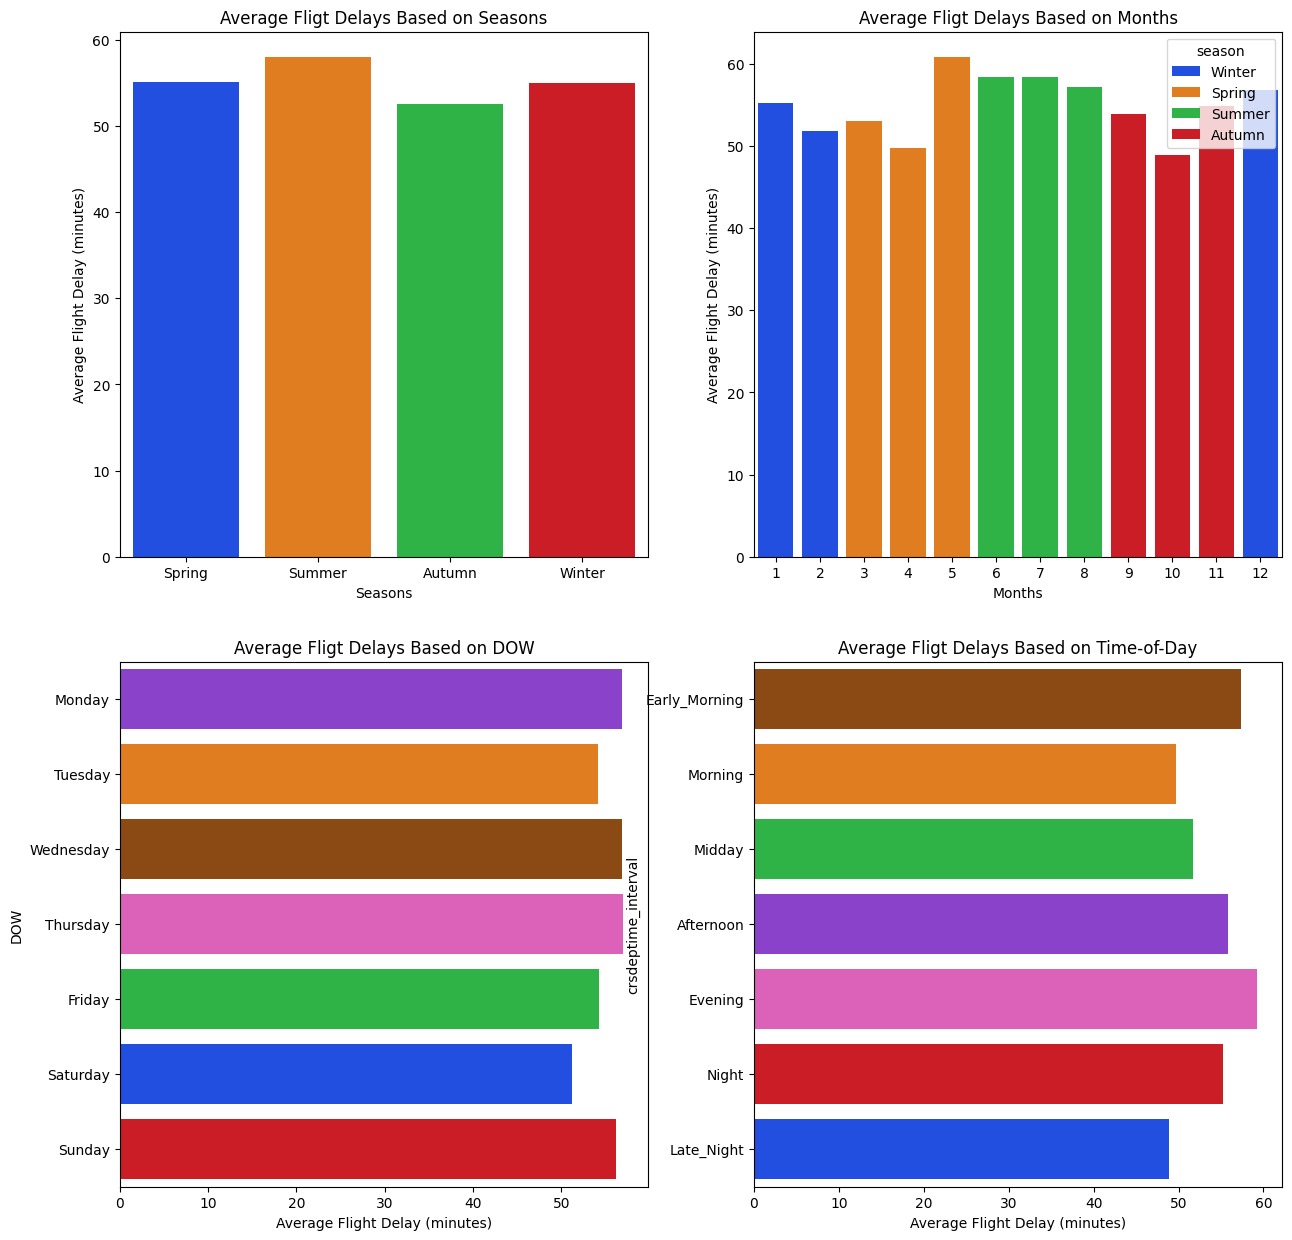

In [115]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.barplot(y='average_depdelay', x='season', data=avgdelay_seasons, palette="bright",
            hue='season', legend=False)
plt.title('Average Fligt Delays Based on Seasons')
plt.xlabel('Seasons')
plt.ylabel('Average Flight Delay (minutes)')

plt.subplot(2,2,2)
sns.barplot(data=avgdelay_month, x="month", y="average_depdelay", hue="season",
            palette="bright")
plt.title('Average Fligt Delays Based on Months')
plt.xlabel('Months')
plt.ylabel('Average Flight Delay (minutes)')

plt.subplot(2,2,3)
sns.barplot(data=avgdelay_dow, x="average_depdelay", y="dow",
            order=["Monday", "Tuesday", "Wednesday", "Thursday","Friday", "Saturday", "Sunday"],
            palette = 'bright', hue='average_depdelay', legend=False)
plt.title('Average Fligt Delays Based on DOW')
plt.xlabel('Average Flight Delay (minutes)')
plt.ylabel('DOW')

plt.subplot(2,2,4)
sns.barplot(data=avgdelay_tod, y="crsdeptime_interval", x="average_depdelay",
            order=["Early_Morning", "Morning", "Midday", "Afternoon", "Evening", "Night", "Late_Night"],
            palette="bright", hue="average_depdelay", legend=False)
plt.title('Average Fligt Delays Based on Time-of-Day')
plt.xlabel('Average Flight Delay (minutes)')

plt.show();

In [46]:
total_fac = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/causeflightdelay_total.csv")
total_fac.head()

,delay_type,delay_count
0,Late_Acft,159308
1,NAS,575199
2,Carrier,567327
3,Weather,115989
4,Security,3568


In [66]:
avgdelay_fac = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/avgdelay_fac.csv")
avgdelay_fac

,avg_carrierdelay,avg_weatherdelay,avg_nasdelay,avg_securitydelay,avg_lateacftdelay
0,13.249748,3.544035,17.217187,0.126087,17.283224


In [67]:
rename_dict = {
    'avg_weatherdelay': 'Weather',
    'avg_nasdelay': 'NAS',
    'avg_securitydelay': 'Security ',
    'avg_lateacftdelay': 'Late_Acft',
    'avg_carrierdelay': 'Carrier'}

avgdelay_fac = avgdelay_fac.rename(columns=rename_dict)
avgdelay_fac = avgdelay_fac.transpose().reset_index()
avgdelay_fac.columns = ['delay_type', 'Average_Delay(minutes)']

avgdelay_fac

,delay_type,Average_Delay(minutes)
0,Carrier,13.249748
1,Weather,3.544035
2,NAS,17.217187
3,Security,0.126087
4,Late_Acft,17.283224


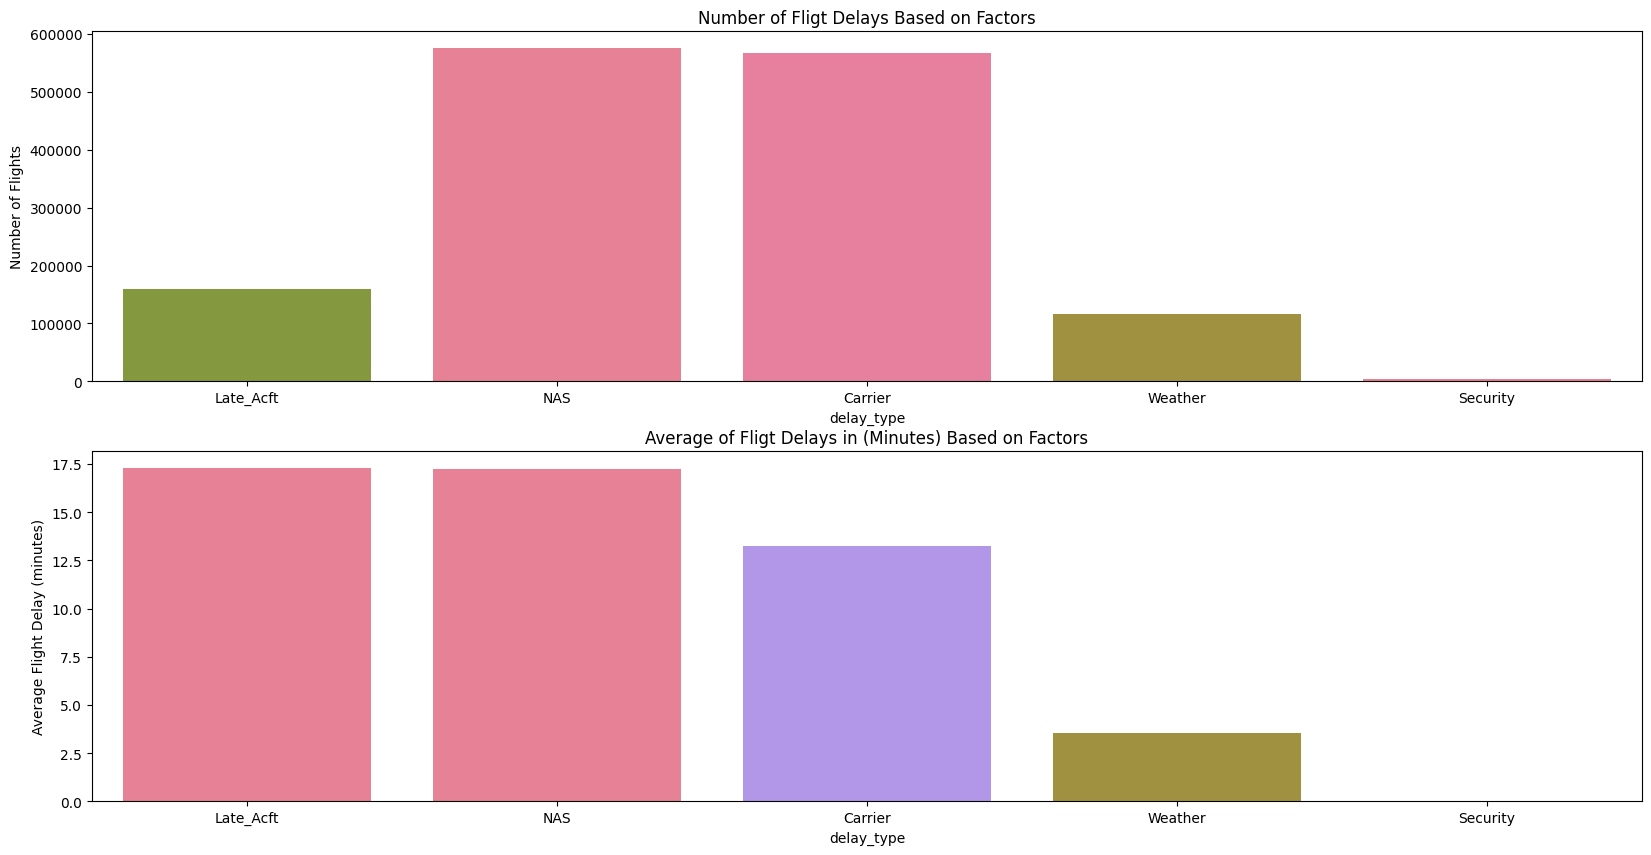

In [68]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.barplot(data=total_fac, y="delay_count", x="delay_type",
            palette="husl", hue="delay_count", legend=False,
            order=["Late_Acft", "NAS", "Carrier", "Weather", "Security"])

plt.title('Number of Fligt Delays Based on Factors')
plt.ylabel('Number of Flights')

plt.subplot(2,1,2)
sns.barplot(data=avgdelay_fac, y="Average_Delay(minutes)", x="delay_type",
            palette="husl", hue="Average_Delay(minutes)", legend=False,
            order=["Late_Acft", "NAS", "Carrier", "Weather", "Security"])

plt.title('Average of Fligt Delays in (Minutes) Based on Factors')
plt.ylabel('Average Flight Delay (minutes)')

plt.show();

In [84]:
canx_code = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/cancellation_code.csv")
canx_code['cancellationcode'] = canx_code['cancellationcode'].replace({'A': 'Carrier', 'B': 'Weather', 'C': 'NAS', 'D': 'Security'})
canx_code

,cancellationcode,total_cancellations
0,Carrier,59352
1,Weather,44558
2,NAS,23732
3,Security,115


In [105]:
canx_month = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/cancellation_month.csv")
canx_month['cancellationcode'] = canx_month['cancellationcode'].replace({'A': 'Carrier', 'B': 'Weather', 'C': 'NAS', 'D': 'Security'})
canx_month.head()

,month,cancellationcode,total_cancellations
0,1,Carrier,6289
1,1,Security,6
2,1,Weather,8894
3,1,NAS,2422
4,10,Weather,1252


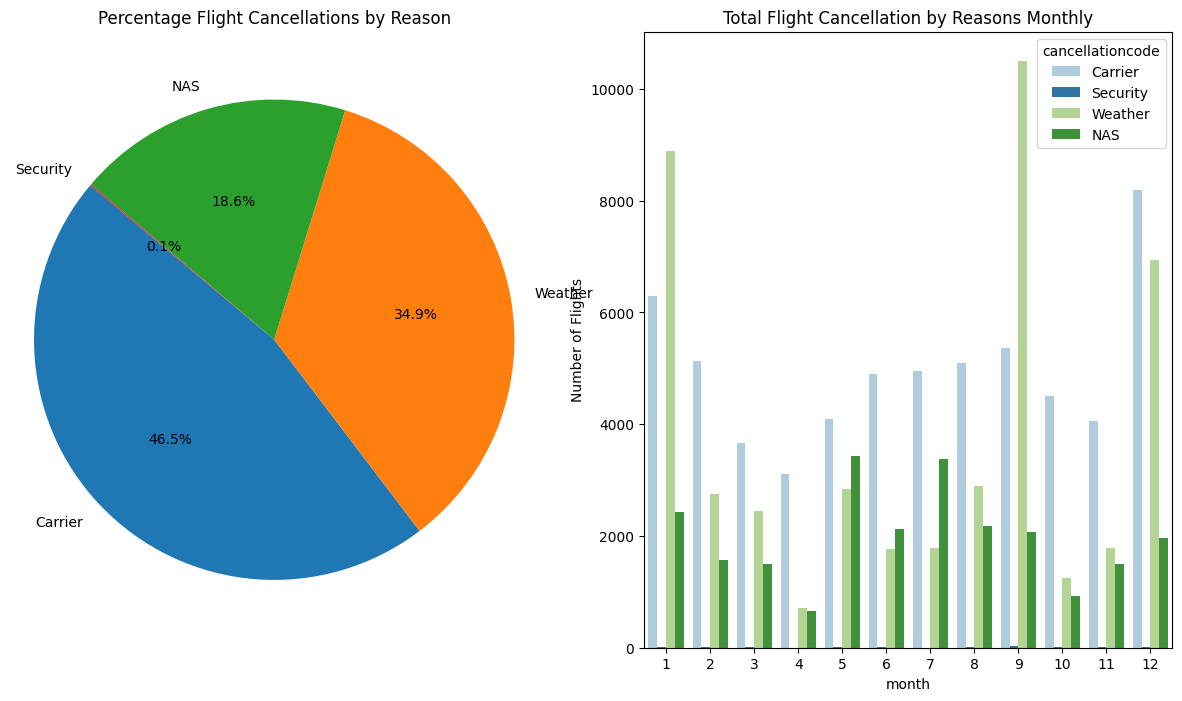

In [83]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
plt.pie(canx_code['total_cancellations'], labels=canx_code['cancellationcode'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Flight Cancellations by Reason')
plt.axis('equal')

plt.subplot(1,2,2)
sns.barplot(data=canx_month, y="total_cancellations", x="month",
            palette="Paired", hue="cancellationcode")
plt.title('Total Flight Cancellation by Reasons Monthly')
plt.ylabel('Number of Flights')

plt.show()

In [106]:
carrier_avgdelay = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/carriers_avgdelay.csv")
carrier_avgdelay.columns = ['Airlines', 'average_depdelay']
carrier_avgdelay.head()

,Airlines,average_depdelay
0,ATA Airlines d/b/a ATA,58.744280
1,AirTran Airways Corporation,58.425452
2,Alaska Airlines Inc.,53.425523
3,America West Airlines Inc. (Merged with US Air...,50.725080
4,American Airlines Inc.,61.958589


In [107]:
carrier_canx = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Analysis/carriers_cancellation.csv")
carrier_canx.columns = ['Airlines', 'total_cancellation']
carrier_canx.head()

,Airlines,total_cancellation
0,ATA Airlines d/b/a ATA,717
1,AirTran Airways Corporation,2013
2,Alaska Airlines Inc.,3670
3,America West Airlines Inc. (Merged with US Air...,3108
4,American Airlines Inc.,12402


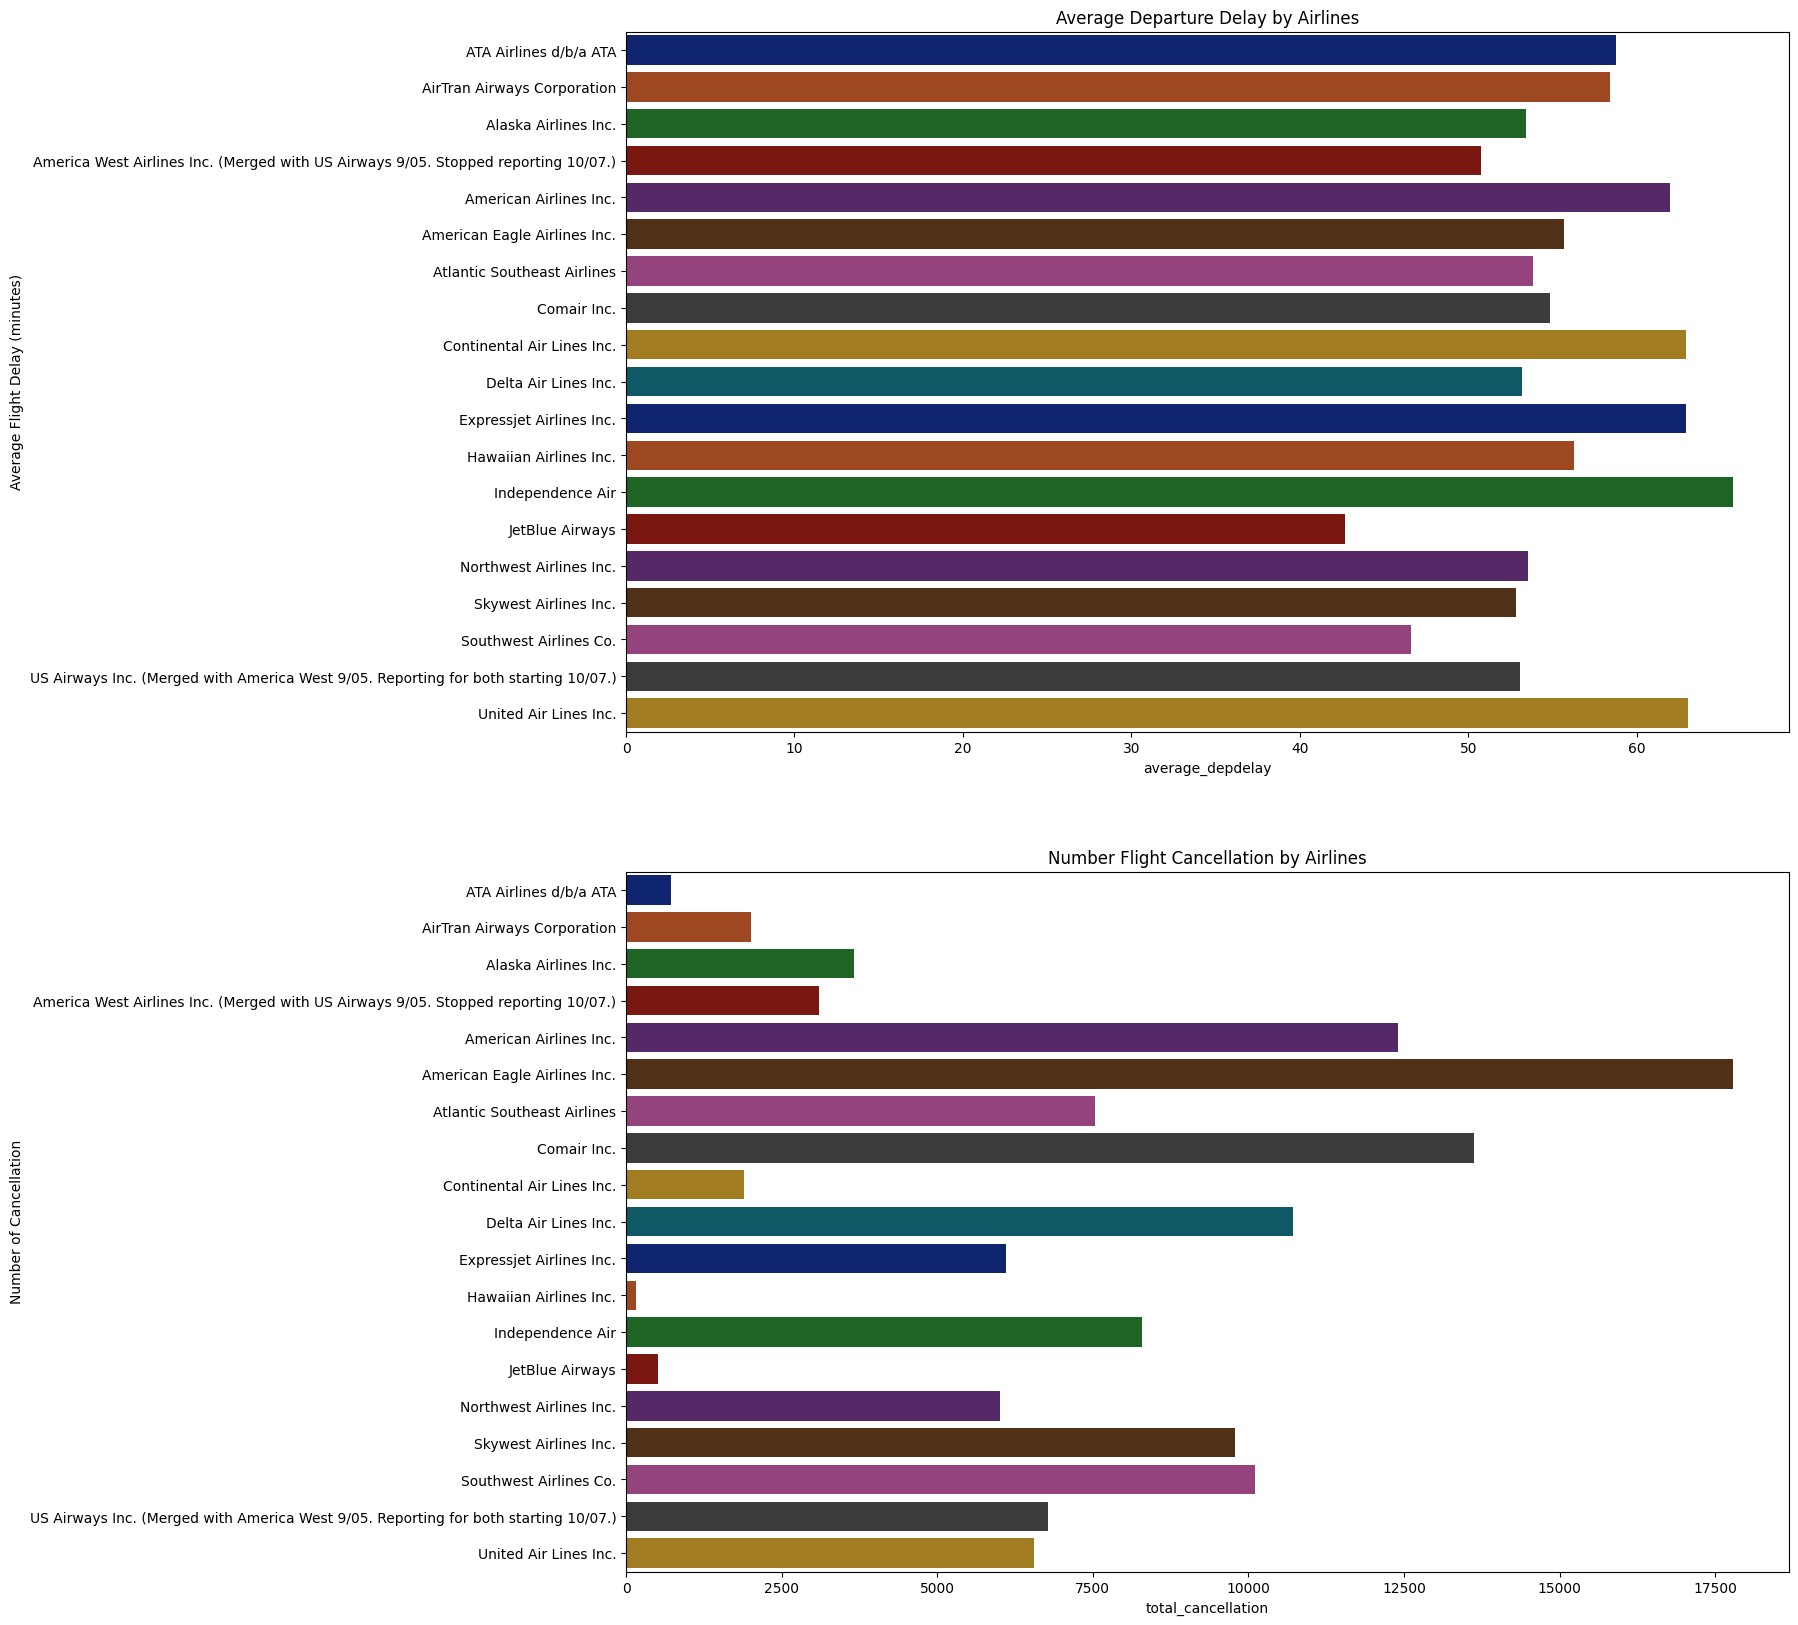

In [101]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
sns.barplot(data=carrier_avgdelay, y="Airlines", x="average_depdelay",
            palette="dark", hue="Airlines", legend=False)

plt.title('Average Departure Delay by Airlines')
plt.ylabel('Average Flight Delay (minutes)')

plt.subplot(2,1,2)
sns.barplot(data=carrier_canx, y="Airlines", x="total_cancellation",
            palette="dark", hue="Airlines", legend=False)

plt.title('Number Flight Cancellation by Airlines')
plt.ylabel('Number of Cancellation')
plt.show()